In [26]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os

from pickle import load
from pickle import dump

# get the output for all commands
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [27]:
df1 = pd.read_csv(r"E:\Excel_files\Intrenship\dataset3.csv",index_col = [0])

In [28]:
df1.isna().sum()

Disease     0
Symptoms    0
dtype: int64

In [29]:
df1 = df1.dropna()

In [30]:
df1.isna().sum()

Disease     0
Symptoms    0
dtype: int64

In [31]:
df1

,Disease,Symptoms
0,hypertensive disease,pain chest
1,hypertensive disease,shortness of breath
2,hypertensive disease,dizziness
3,hypertensive disease,asthenia
4,hypertensive disease,fall
...,...,...
1216,delusion,blackout
1217,delusion,weepiness
1218,delusion,impaired cognition
1219,delusion,irritable mood


## Machine Learning

In [72]:
# # Identify the inputs (X) and output (y)
# 
# y = df1['Disease']
# X = df1[['Symptoms']]

In [73]:
# y.unique()

array(['hypertensive disease', 'diabetes',
       'depression mental depressive disorder',
       'coronary arteriosclerosis,coronary heart disease', 'pneumonia',
       'myocardial infarction', 'anxiety state', 'cellulitis',
       'gastroesophageal reflux disease', 'deep vein thrombosis',
       'epilepsy', 'cardiomyopathy', 'carcinoma', 'psychotic disorder',
       'hyperlipidemia', 'obesity', 'kidney failure acute', 'arthritis',
       'hemiparesis', 'paranoia', 'pancreatitis', 'hernia',
       'edema pulmonary', 'ulcer peptic', 'gastritis', 'bacteremia',
       'failure heart', 'upper respiratory infection',
       'deglutition disorder', 'colitis', 'parkinson disease',
       "Alzheimer's disease", 'candidiasis, oral candidiasis',
       'ketoacidosis diabetic', 'malignant neoplasms',
       'personality disorder', 'primary carcinoma of the liver cells',
       'hemorrhoids', 'spasm bronchial',
       'effusion pericardial, pericardial effusion body substance',
       'chronic al

In [105]:
# split into train and test

# from sklearn.model_selection import train_test_split
# 
# X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.80, random_state = 100)

In [75]:
# !pip install category_encoders

In [76]:
# import category_encoders as ce


In [77]:
#Create target encoding object
# encoder=ce.TargetEncoder(cols='class') 


In [150]:
X_train = pd.read_csv(r"E:\Excel_files\Intrenship\X_train.csv")
X_test = pd.read_csv(r"E:\Excel_files\Intrenship\X_test.csv")

In [152]:
X_train_ = X_train.drop(["Unnamed: 0", "Disease"], axis=1)

In [154]:
X_train_

,Symptoms
0,pain chest
1,shortness of breath
2,dizziness
3,asthenia
4,fall
...,...
1216,blackout
1217,weepiness
1218,impaired cognition
1219,irritable mood


In [155]:
X_test_ = X_test.drop(["Unnamed: 0", "Disease"], axis=1)

In [156]:
X_test_

,Symptoms
0,angina pectoris
1,pressure chest
2,polyuria
3,labored breathing
4,nightmare
...,...
92,pain abdominal
93,flatulence
94,neologism
95,homicidal thoughts


In [157]:

y_train_ = X_train["Disease"]

y_test_ = X_test["Disease"]

In [158]:
print(X_train_.shape, y_train_.shape)
print(X_test_.shape, y_test_.shape)

(1221, 1) (1221,)
(97, 1) (97,)


In [159]:
df1['Disease'].nunique()

46

In [160]:
df1['Symptoms'].nunique()

367

In [161]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# X_train_tans = le.fit_transform(X_train)
# X_test = X_test.map(lambda s: 'other' if s not in le.classes_ else s)
# # le_classes = le.classes_.tolist()
# #bisect.insort_left(le_classes, 'other')
# # le.classes_ = le_classes
# X_test_tans = le.transform(X_test)
# X_test_tans

In [167]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import LabelEncoder

encoder_ = LabelEncoder()

# column names are (annoyingly) Lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)\

X_train_trans = pd.DataFrame(encoder_.fit_transform(X_train_),
                           columns = X_train_.columns,
                              index = X_train_.index)
X_train_trans.head()

X_test_trans = pd.DataFrame(encoder_.transform(X_test_),
                              columns = X_test_.columns,
                              index = X_test_.index)
X_test_trans.head()

,Symptoms
0,234
1,297
2,76
3,24
4,100


,Symptoms
0,16
1,261
2,257
3,185
4,220


In [169]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_trans, y_train_)

y_test_pred = classifier.predict(X_test_trans)



from sklearn import metrics
Accuracy_RFC = metrics.accuracy_score(y_test_, y_test_pred)
print('Accuracy: ',Accuracy_RFC)

RandomForestClassifier()

Accuracy:  0.26804123711340205


In [171]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

train_scores, test_scores = list(), list()

values = [i for i in range(400,1000,100)]

for i in values:
    model = RandomForestClassifier(max_depth=i)

    model.fit(X_train_trans, y_train_)

    y_train_pred = model.predict(X_train_trans)
    train_score = accuracy_score(y_train_, y_train_pred)
    train_scores.append(train_score)

    y_test_pred = model.predict(X_test_trans)
    test_score = accuracy_score(y_test_, y_test_pred)
    test_scores.append(test_score)

    print('> %d, train: %.3f, test: %.3f' % (i, train_score, test_score))



RandomForestClassifier(max_depth=400)

> 400, train: 0.336, test: 0.196


RandomForestClassifier(max_depth=500)

> 500, train: 0.336, test: 0.289


RandomForestClassifier(max_depth=600)

> 600, train: 0.336, test: 0.289


RandomForestClassifier(max_depth=700)

> 700, train: 0.336, test: 0.216


RandomForestClassifier(max_depth=800)

> 800, train: 0.336, test: 0.247


RandomForestClassifier(max_depth=900)

> 900, train: 0.336, test: 0.278


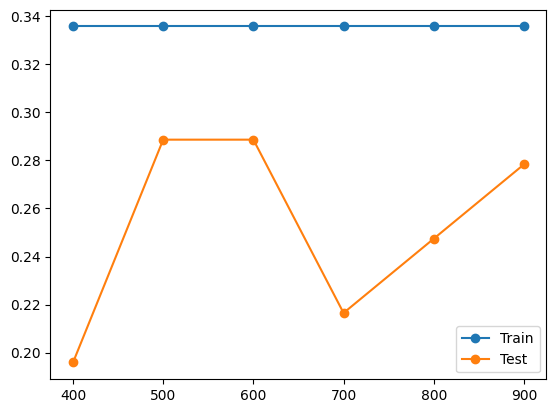

In [172]:
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

In [173]:
X_test_trans

,Symptoms
0,16
1,261
2,257
3,185
4,220
...,...
92,233
93,113
94,217
95,155


In [176]:
Algorithm = []
Accuracy_score = []
Precision_score=[]
F1_score=[]

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train_trans, y_train_)
y_test_pred = classifier.predict(X_test_trans)
from sklearn import metrics
a=metrics.accuracy_score(y_test_,y_test_pred)
Algorithm.append("LogisticRegression")
Accuracy_score.append(a)
Precision_score.append(metrics.precision_score(y_test_,y_test_pred,average='weighted'))
# Confusion_matrix.append(metrics.confusion_matrix(y_test,y_test_pred,))
F1_score.append(metrics.f1_score(y_test_,y_test_pred,average='weighted'))

print(a)

KNeighborsClassifier()

0.25773195876288657
